In [117]:

##########################################################
#  Python script template for Question 2 (IAML Level 10)
#  Note that
#  - You should not change the filename of this file, 'iaml01cw2_q2.py', which is the file name you should use when you submit your code for this question.
#  - You should define the functions shown below in your code.
#  - You can define function arguments (parameters) and returns (attributes) if necessary.
#  - In case you define helper functions, do not define them here, but put them in a separate Python module file, "iaml01cw2_helpers.py", and import it in this script.
#  - For those questions requiring you to show results in tables, your code does not need to present them in tables - just showing them with print() is fine.
#  - You do not need to include this header in your submission
##########################################################

#--- Code for loading the data set and pre-processing --->
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
sys.path.insert(0, os.path.abspath('../helpers'))
from iaml01cw2_helpers import *

# Load the data:
dataPath = os.path.join(os.getcwd(),'../data')
Xtrn, Ytrn, Xtst, Ytst = load_FashionMNIST(dataPath)
Xtrn_orig = Xtrn.copy
Xtst_orig = Xtst.copy
Xtrn = Xtrn/255
Xtst = Xtst/255

Xmean = Xtrn.mean(0)
Xtrn_nm = Xtrn - Xmean
Xtst_nm = Xtst - Xmean
#<----

# Q2.1
def iaml01cw2_q2_1():
    from sklearn.linear_model import LogisticRegression
    import pandas as pd
    
    print("Starting Q2.1...\n")
    
    #Initialize and train our LogisticRegression model
    lr = LogisticRegression().fit(Xtrn_nm,Ytrn)
    pred = lr.predict(Xtst_nm)
    
    #Print the confusion matrix for prediction frequencies
    print("FREQUENCY CONFUSION MATRIX:\n")
    cm = pd.crosstab(pred,Ytst,rownames=["Actual"],colnames=["Predicted"])
    print(cm.round(3))
    
    #Print the confusion matrix for prediction percentages
    print("\n\nPERCENTAGE CONFUSION MATRIX:\n")
    cm2 = cm/np.sum(cm,axis=1)
    print((cm2*100).round(1))
    
    #Print the total classification accuracy
    print("\n\nClassification accuracy = " + str((((cm*np.identity(10)).sum().sum()/cm.sum().sum())*100).round(3)) + "%")
    
#
# iaml01cw2_q2_1()   # comment this out when you run the function

# Q2.2
def iaml01cw2_q2_2():
    from sklearn.svm import SVC
    import pandas as pd
    
    print("Starting Q2.2...\n")
    
    #Initialize and train our SVM model
    svc = SVC(kernel = "rbf", C=1.0, gamma = "auto").fit(Xtrn_nm,Ytrn)
    pred = svc.predict(Xtst_nm)
    
    #Print the confusion matrix for prediction frequencies
    print("FREQUENCY CONFUSION MATRIX:\n")
    cm = pd.crosstab(pred,Ytst,rownames=["Actual"],colnames=["Predicted"])
    print(cm.round(3))
    
    #Print the confusion matrix for prediction percentages
    print("\n\nPERCENTAGE CONFUSION MATRIX:\n")
    cm2 = cm/np.sum(cm,axis=1)
    print((cm2*100).round(1))
    
    #Print the total classification accuracy
    print("\n\nClassification accuracy = " + str((((cm2*np.identity(10)).sum().sum()/10)*100).round(3)) + "%")
    
#
# iaml01cw2_q2_2()   # comment this out when you run the function

# Q2.3
def iaml01cw2_q2_3():
    from sklearn.linear_model import LogisticRegression
    from sklearn.decomposition import PCA
    import statistics as stats
    from matplotlib import ticker

    print("Starting Q2.3...\n")
    
    #Initialize and train our LogisticRegrssion model
    lr = LogisticRegression().fit(Xtrn_nm[0:10000,:],Ytrn[0:10000])
    
    pca1 = PCA().fit(Xtrn_nm[0:10000,:])
    
    #Initialize and fit our PCA model
    pca = PCA(n_components=2).fit(Xtrn_nm[0:10000,:])
    
    pc0 = pca.components_[0]
    pc1 = pca.components_[1]
    pc0Stdev = stats.stdev(pc0)
    pc1Stdev = stats.stdev(pc1)
    
    x = np.linspace(-5*pc0Stdev,5*pc0Stdev,100)
    y = np.linspace(-5*pc1Stdev,5*pc1Stdev,100)
    xx, yy = np.meshgrid(x,y)

    z = np.empty((100,100))
    
    for r in range(100):
        for c in range(100):
            Z = np.zeros((1,784))
            Z[0,0] = xx[r,c]
            Z[0,1] = yy[r,c]
            x784 = np.dot(Z,pca1.components_)
            
            z[r,c] = lr.predict(x784)
    
    print(np.unique(z))
    #Plot the contourf
    cs = plt.contourf(xx,yy,z,cmap="coolwarm")
    
    #Plot the colorbar
    cbar = plt.colorbar(cs)
    #tick_locator = ticker.MaxNLocator(nbins=10)
    #cbar.locator = tick_locator
    #cbar.update_ticks()
    #cbar.ax.set_yticklabels(range(10))
    cbar.set_label("\nClass number")
    
    #Set the x and y limits of the plot
    plt.xlim(-5*pc0Stdev,5*pc0Stdev)
    plt.ylim(-5*pc1Stdev,5*pc1Stdev)
    
    #Label features on our plot
    plt.title("A 2D-PCA plane to show the decision regions for\nour trained logistic regression classifier")
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    
    #Plot the x and y axes in terms of standard deviations
    newX = [-5*pc0Stdev,-2.5*pc0Stdev,0,2.5*pc0Stdev,5*pc0Stdev]
    plt.xticks(newX,["-5$\sigma_1$","-2.5$\sigma_1$","0$\sigma_1$","2.5$\sigma_1$","5$\sigma_1$"])
    newY = [-5*pc1Stdev,-2.5*pc1Stdev,0,2.5*pc1Stdev,5*pc1Stdev]
    plt.yticks(newY,["-5$\sigma_2$","-2.5$\sigma_2$","0$\sigma_2$","2.5$\sigma_2$","5$\sigma_2$"])
    
    #Plot the cross section
    plt.axhline(0, color='black')
    plt.axvline(0, color='black')
    plt.show()
    
#
# iaml01cw2_q2_3()   # comment this out when you run the function

# Q2.4
def iaml01cw2_q2_4():
    from sklearn.svm import SVC
    from sklearn.decomposition import PCA
    import statistics as stats
    from matplotlib import ticker

    print("Starting Q2.4...\n")
    
    #Initialize and train our SVM model
    svc = SVC(kernel = "rbf", C=1.0, gamma = "auto").fit(Xtrn_nm[0:5000,:],Ytrn[0:5000])
    
    pca1 = PCA().fit(Xtrn_nm[0:5000,:])
    
    #Initialize and fit our PCA model
    pca = PCA(n_components=2).fit(Xtrn_nm[0:5000,:])
    
    pc0 = pca.components_[0]
    pc1 = pca.components_[1]
    pc0Stdev = stats.stdev(pc0)
    pc1Stdev = stats.stdev(pc1)
    
    x = np.linspace(-5*pc0Stdev,5*pc0Stdev,100)
    y = np.linspace(-5*pc1Stdev,5*pc1Stdev,100)
    xx, yy = np.meshgrid(x,y)

    z = np.empty((100,100))
    
    for r in range(100):
        for c in range(100):
            Z = np.zeros((1,784))
            Z[0,0] = xx[r,c]
            Z[0,1] = yy[r,c]
            x784 = np.dot(Z,pca1.components_)
            
            z[r,c] = svc.predict(x784)
    
    print(np.unique(z))
    #Plot the contourf
    cs = plt.contourf(xx,yy,z,cmap="coolwarm")
    
    #Plot the colorbar
    cbar = plt.colorbar(cs)
    #tick_locator = ticker.MaxNLocator(nbins=10)
    #cbar.locator = tick_locator
    #cbar.update_ticks()
    #cbar.ax.set_yticklabels(range(10))
    cbar.set_label("\nClass number")
    
    #Set the x and y limits of the plot
    plt.xlim(-5*pc0Stdev,5*pc0Stdev)
    plt.ylim(-5*pc1Stdev,5*pc1Stdev)
    
    #Label features on our plot
    plt.title("A 2D-PCA plane to show the decision regions\nfor our trained SVM classifier")
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    
    #Plot the x and y axes in terms of standard deviations
    newX = [-5*pc0Stdev,-2.5*pc0Stdev,0,2.5*pc0Stdev,5*pc0Stdev]
    plt.xticks(newX,["-5$\sigma_1$","-2.5$\sigma_1$","0$\sigma_1$","2.5$\sigma_1$","5$\sigma_1$"])
    newY = [-5*pc1Stdev,-2.5*pc1Stdev,0,2.5*pc1Stdev,5*pc1Stdev]
    plt.yticks(newY,["-5$\sigma_2$","-2.5$\sigma_2$","0$\sigma_2$","2.5$\sigma_2$","5$\sigma_2$"])
    
    #Plot the cross section
    plt.axhline(0, color='black')
    plt.axvline(0, color='black')
    plt.show()
    
#
# iaml01cw2_q2_4()   # comment this out when you run the function

# Q2.5
def iaml01cw2_q2_5():
    from sklearn.svm import SVC
    from sklearn.model_selection import cross_val_score
    import math
    
    #Set the quality of the plt's figure output
    plt.rcParams["figure.figsize"] = (10,10)
    
    print("Starting Q2.5...\n")    
    
    #Initialize numpy matrices to store our sliced dataset
    Xsmall = np.empty((10000,784))
    Ysmall = np.empty(10000)
    
    #Numpy array to store the amount of samples for each class
    classAmounts = np.zeros(10)
    
    #Populate the Xsmall and Ysmall numpy matrices
    index = 0
    for row in range(Xtrn_nm.shape[0]):
        
        label = Ytrn[row]
        
        #Checks if a class has 1000 samples yet
        if classAmounts[label] < 1000:
            Xsmall[index,:] = Xtrn_nm[row,:]
            Ysmall[index] = label
            classAmounts[label] += 1
            index += 1
        
        #If our dataset has 10000 samples we break the loop
        if classAmounts.sum() == 10000:
            break
    
    #Create 10 equally log spaced values for C
    C = np.logspace(-2,3,10,endpoint=True)
    print(C)
    
    #Initialize numpy array to store the accuracies
    accuracies = np.empty(10)
    
    #Iterate through each value of C
    for i in range(C.size):
        c = C[i]
        print(c)
        
        #Initialize our SVM model
        svc = SVC(kernel = "rbf", C=c, gamma = "auto")
        
        #Get the cross-validated classification accuracy
        score = cross_val_score(svc,Xsmall,Ysmall,cv=3)
        accuracies[i] = np.sum(score)/len(score)
        print(accuracies[i])
    
    #Plot the accuracies against the values of C
    plt.scatter(C,accuracies,c="black")
    plt.plot(C,accuracies,c="black")
    
    #Highlight the point of maximum accuracy
    maxIndex = np.where(accuracies == max(accuracies))
    plt.scatter(C[maxIndex],accuracies[maxIndex],c="red",label="Highest mean accuracy")
    plt.legend(loc="upper left")
    
    #Plot features for further readability
    plt.grid(True)
    plt.xscale('log')
    plt.xlabel("C",fontsize=16)
    plt.ylabel("Mean cross-validated classification accuracy",fontsize=16)
    plt.title("A graph to show the relationship between the regularisation\nparameter C and the mean cross-validated classification\naccuracy of our SVM model",fontsize=18)
        
    
#
# iaml01cw2_q2_5()   # comment this out when you run the function

# Q2.6 
def iaml01cw2_q2_6():
    from sklearn.svm import SVC
    import math
    
    print("Starting Q2.6...\n")
    
    #The optimal value of C found
    C = 10**(4/3)
    
    #Initialize and train our SVM model
    svc = SVC(kernel="rbf",C=C,gamma="auto").fit(Xtrn_nm,Ytrn)
    
    #Print the training and testing accuracies of this model
    print("Training accuracy = " + str(round(svc.score(Xtrn_nm,Ytrn)*100,3)) + "%")
    print("Testing accuracy = " + str(round(svc.score(Xtst_nm,Ytst)*100,3)) + "%")
    
#
# iaml01cw2_q2_6()   # comment this out when you run the function



Starting Q2.4...

[6.]


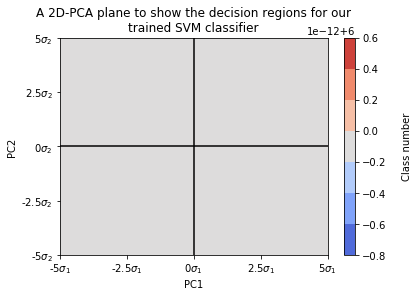

In [118]:
iaml01cw2_q2_4()